In [1]:
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.axisartist.floating_axes as floating_axes
import mpl_toolkits.axisartist.angle_helper as angle_helper
from mpl_toolkits.axisartist.grid_finder import MaxNLocator
from matplotlib.transforms import Affine2D
from scipy.integrate import quad as quad
import sys
sys.path.insert(0, "/scratch/ierez/IGMCosmo/VoidFinder/python/")
#import voidfinder
#from voidfinder import distance
#from voidfinder.distance import z_to_comoving_dist
from astropy import constants as const
from astropy.table import Table

import os
from astropy.io import fits
in_directory='/scratch/ierez/IGMCosmo/VoidFinder/outputs/delta_runs/'
os.chdir(in_directory)

## Data files

In [2]:
deltafields_filename = '/scratch/ierez/IGMCosmo/VoidFinder/data/DR16S82_H/delta_fields/deltafields_RAadded90.fits' #delta_fields
quasars_filename='/scratch/ierez/IGMCosmo/VoidFinder/data/DR16S82_H/delta_fields/quasars.fits'
#void_filename = '/Users/kellydouglass/Documents/Research/Voids/VoidFinder/void_catalogs/SDSS/python_implementation/vollim_dr7_cbp_102709_comoving_maximal.txt'
void_filename = '/scratch/ierez/IGMCosmo/VoidFinder/outputs/delta_runs/before_names/deltafields_RAadded90._comoving_maximal_noMagCut.txt'

## Import data

In [3]:
# Galaxy catalog
#galaxies = Table.read(galaxy_filename, format='ascii.commented_header', 
#                      include_names=['ra', 'dec', 'redshift', 'Rgal', 'vflag'])
deltaf = fits.open(deltafields_filename)  
deltaf=Table(deltaf[1].data)
deltaf['z'].name='redshift'
#rgal=Table.Column(1*np.ones(len(galaxies['ra'])), name='Rgal')
#galaxies.add_column(rgal)
vflag=Table.Column(np.zeros(len(deltaf['ra'])), name='vflag')
deltaf.add_column(vflag)
# Void catalog (detected voids, output of voidfinder)
voids = Table.read(void_filename, format='ascii.commented_header')

quasars = fits.open(quasars_filename)  
quasars=Table(quasars[1].data)

## z to comoving distance

In [4]:
#z to comoving
#voidfinder.distance.z_to_comoving_dist

Omega_M = 0.3147
c = const.c.to('km/s').value
def Distance(z,omega_m = Omega_M,h = 1):
    dist = np.ones(len(z))
    H0 = 100*h
    for i,redshift in enumerate(z):
        a_start = 1/(1+redshift)
        I = quad(f,a_start,1,args=omega_m)
        dist[i] = I[0]*(c/H0)
    return dist

def f(a,omega_m = Omega_M):
     return 1/(np.sqrt(a*omega_m*(1+((1-omega_m)*a**3/omega_m))))

deltaf['comoving']= Distance(deltaf['redshift'],Omega_M,1)
quasars['comoving']= Distance(quasars['z'],Omega_M,1)
#Continue with voids['r']

## Shift ra's back for all

In [ ]:
deltaf['ra'] = deltaf['ra']-90
quasars['ra'] = quasars['ra']
voids['ra'] = voids['ra']-90

In [ ]:
len(voids)

8513

In [ ]:
voids[0:5]

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
-1786.3228412308565,4075.892018974157,-28.017042804333936,48.72537522929109,0,4450.239319197093,23.66618080533604,-0.3607151877056078
-1736.2178619987644,3961.0809312215224,-33.951520242704305,47.485907523919906,1,4325.016452423865,23.668762378896915,-0.4497783578173037
2720.5185726058826,3517.0647803608485,38.589499102218255,46.425788184131264,2,4446.622889630873,-37.72265440085845,0.49724099421747875
-658.4844250548334,4293.107829663064,-3.316472012632933,46.183465702890594,3,4343.3152745501575,8.720167725252253,-0.04374995957026541
-1695.9758448087616,3867.617769013502,-34.04502761148298,45.940707441166175,4,4223.264180378589,23.67776720662833,-0.4618838509164833


## Histogram for voids

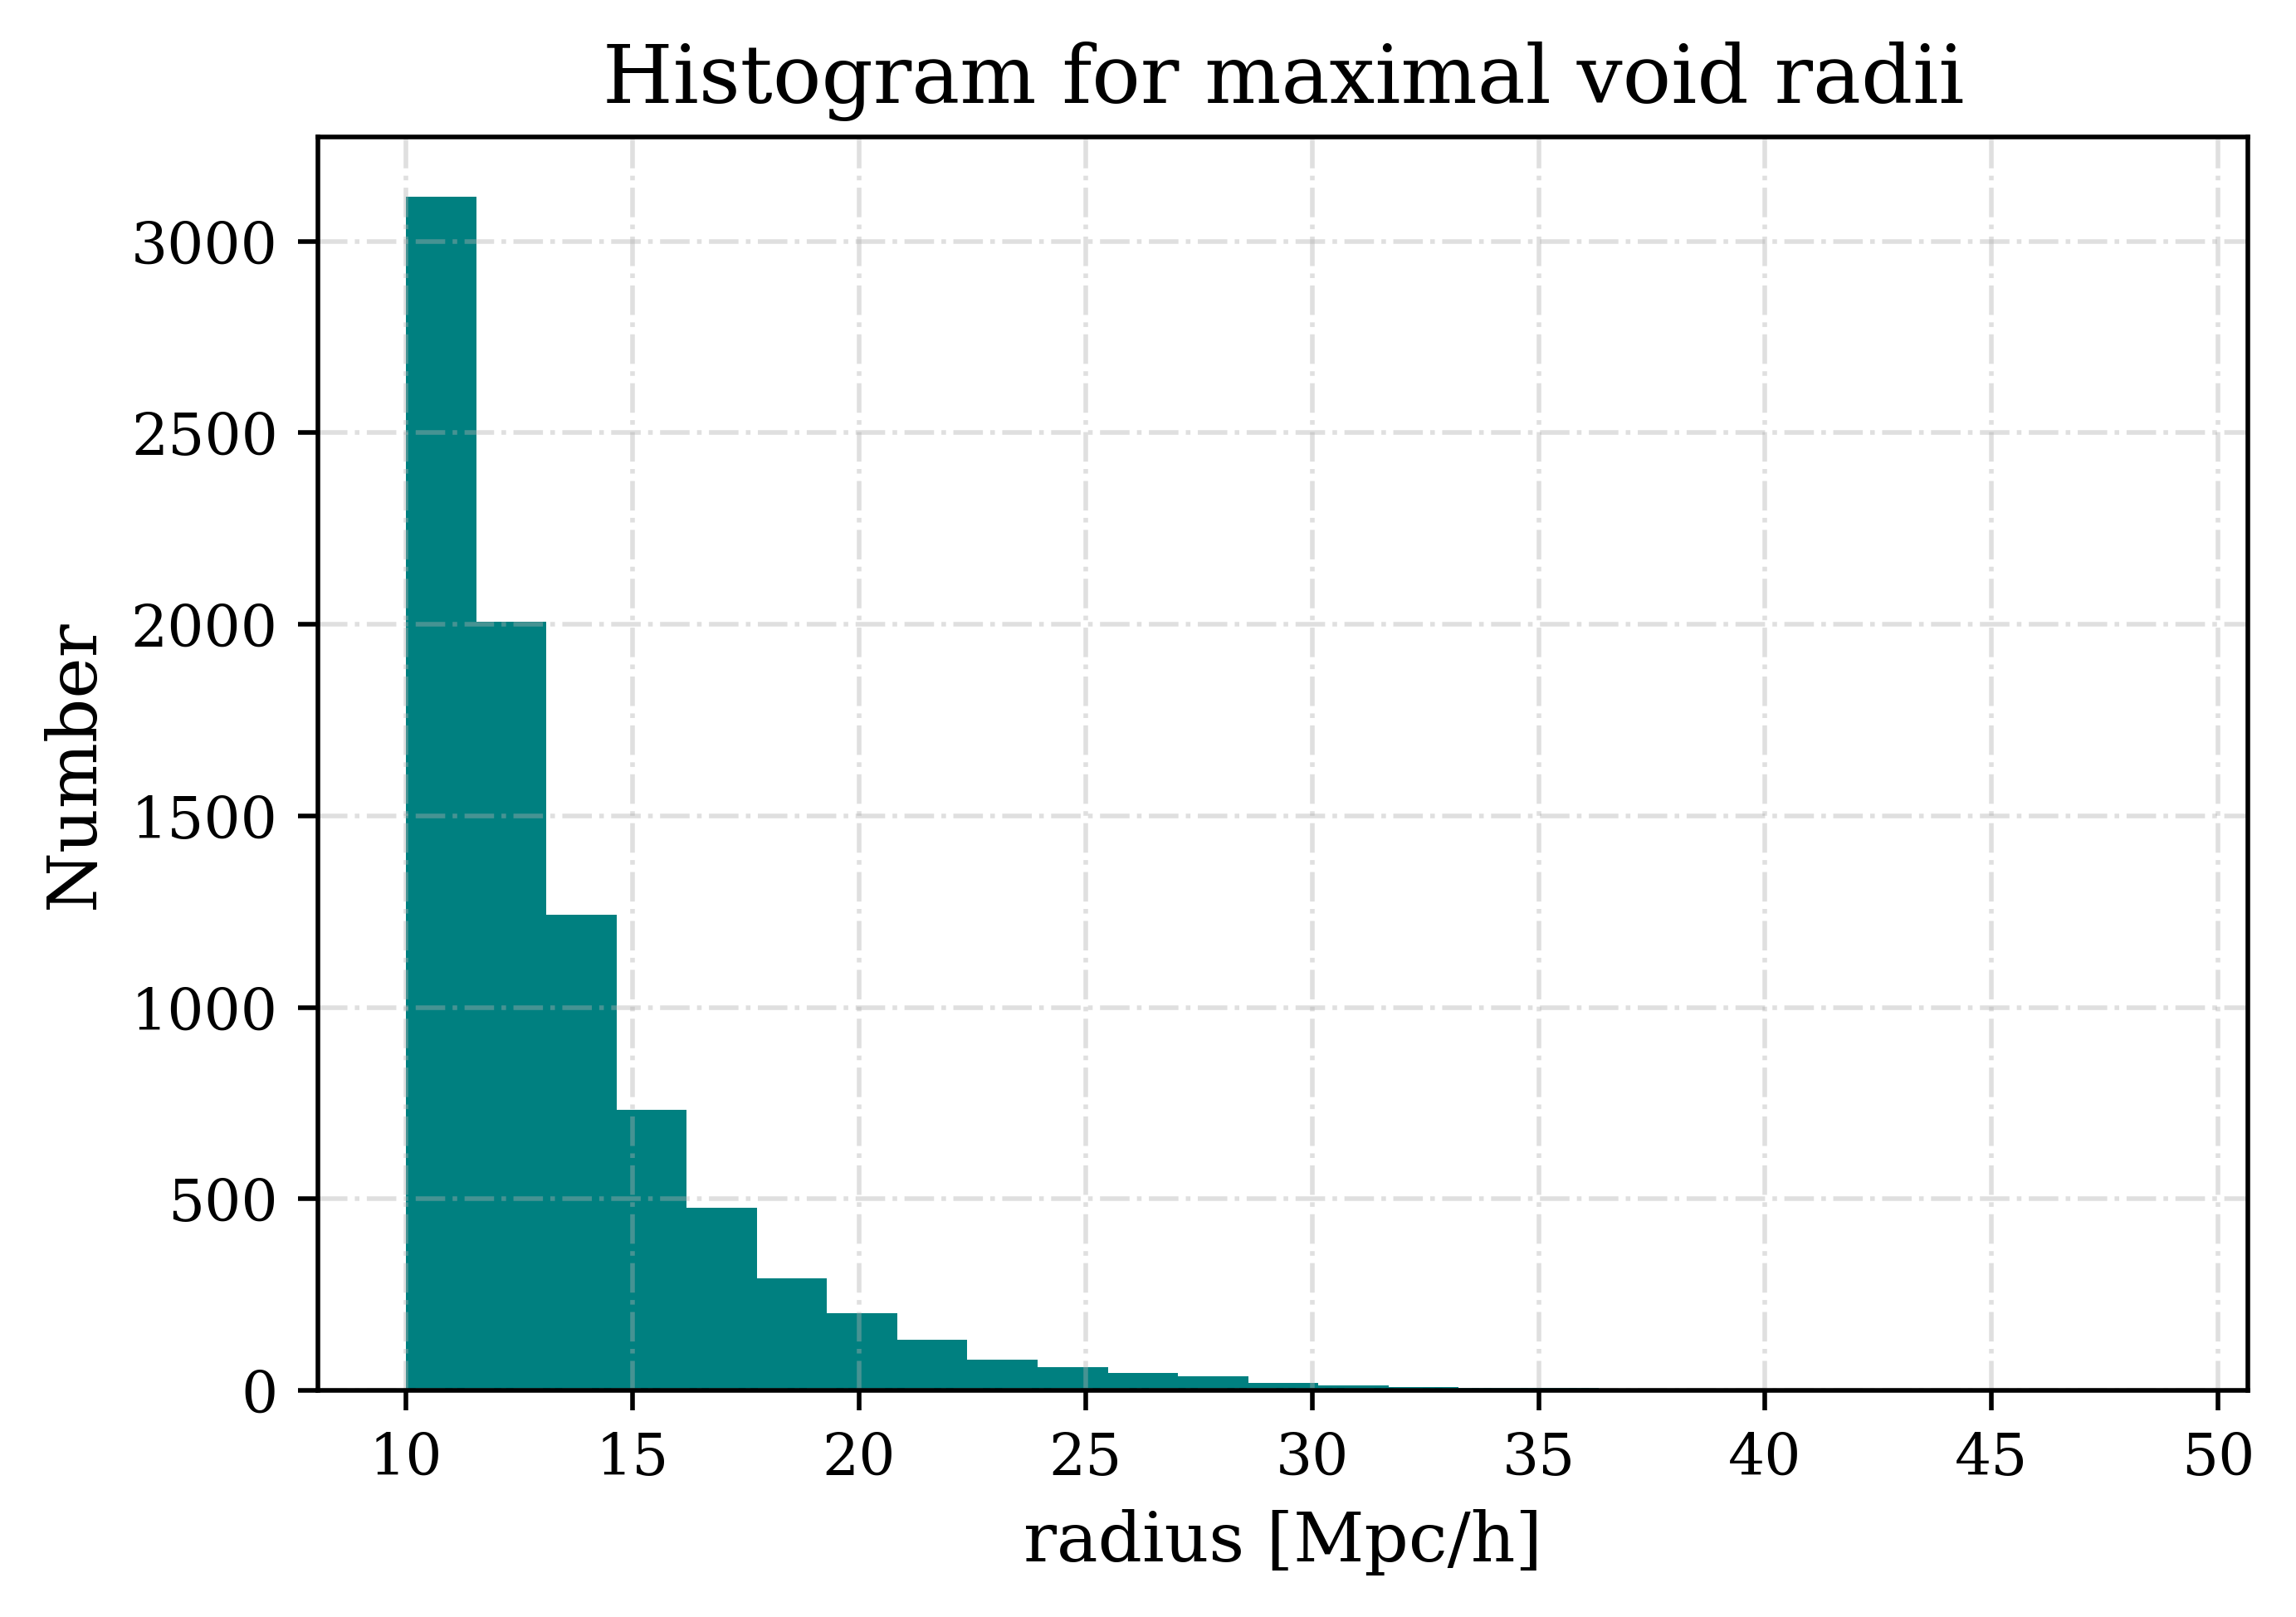

In [ ]:
#Histogram of redshift
dpi=500
mpl.rcParams['figure.dpi']= dpi

plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Histogram for maximal void radii',fontsize=14)                                         
plt.xlabel(r'radius [Mpc/h]',fontsize=12)                                                                       
plt.ylabel(r'Number',fontsize=12)                                                                   
                                                                                                    
plt.hist(voids['radius'] ,color='teal',bins=25)#,bins=range(int(min(galaxies['cz'])), int(max(galaxies['cz'])) + 0.1, 0.1), color='teal')                                                                   \
                                                                                                    
#plt.hist(2*np.pi*data[1].data['ra'], color='teal')                                                  
plt.show()                                                                                          
                                                                                                    
#plt.savefig('cz_distn.png')

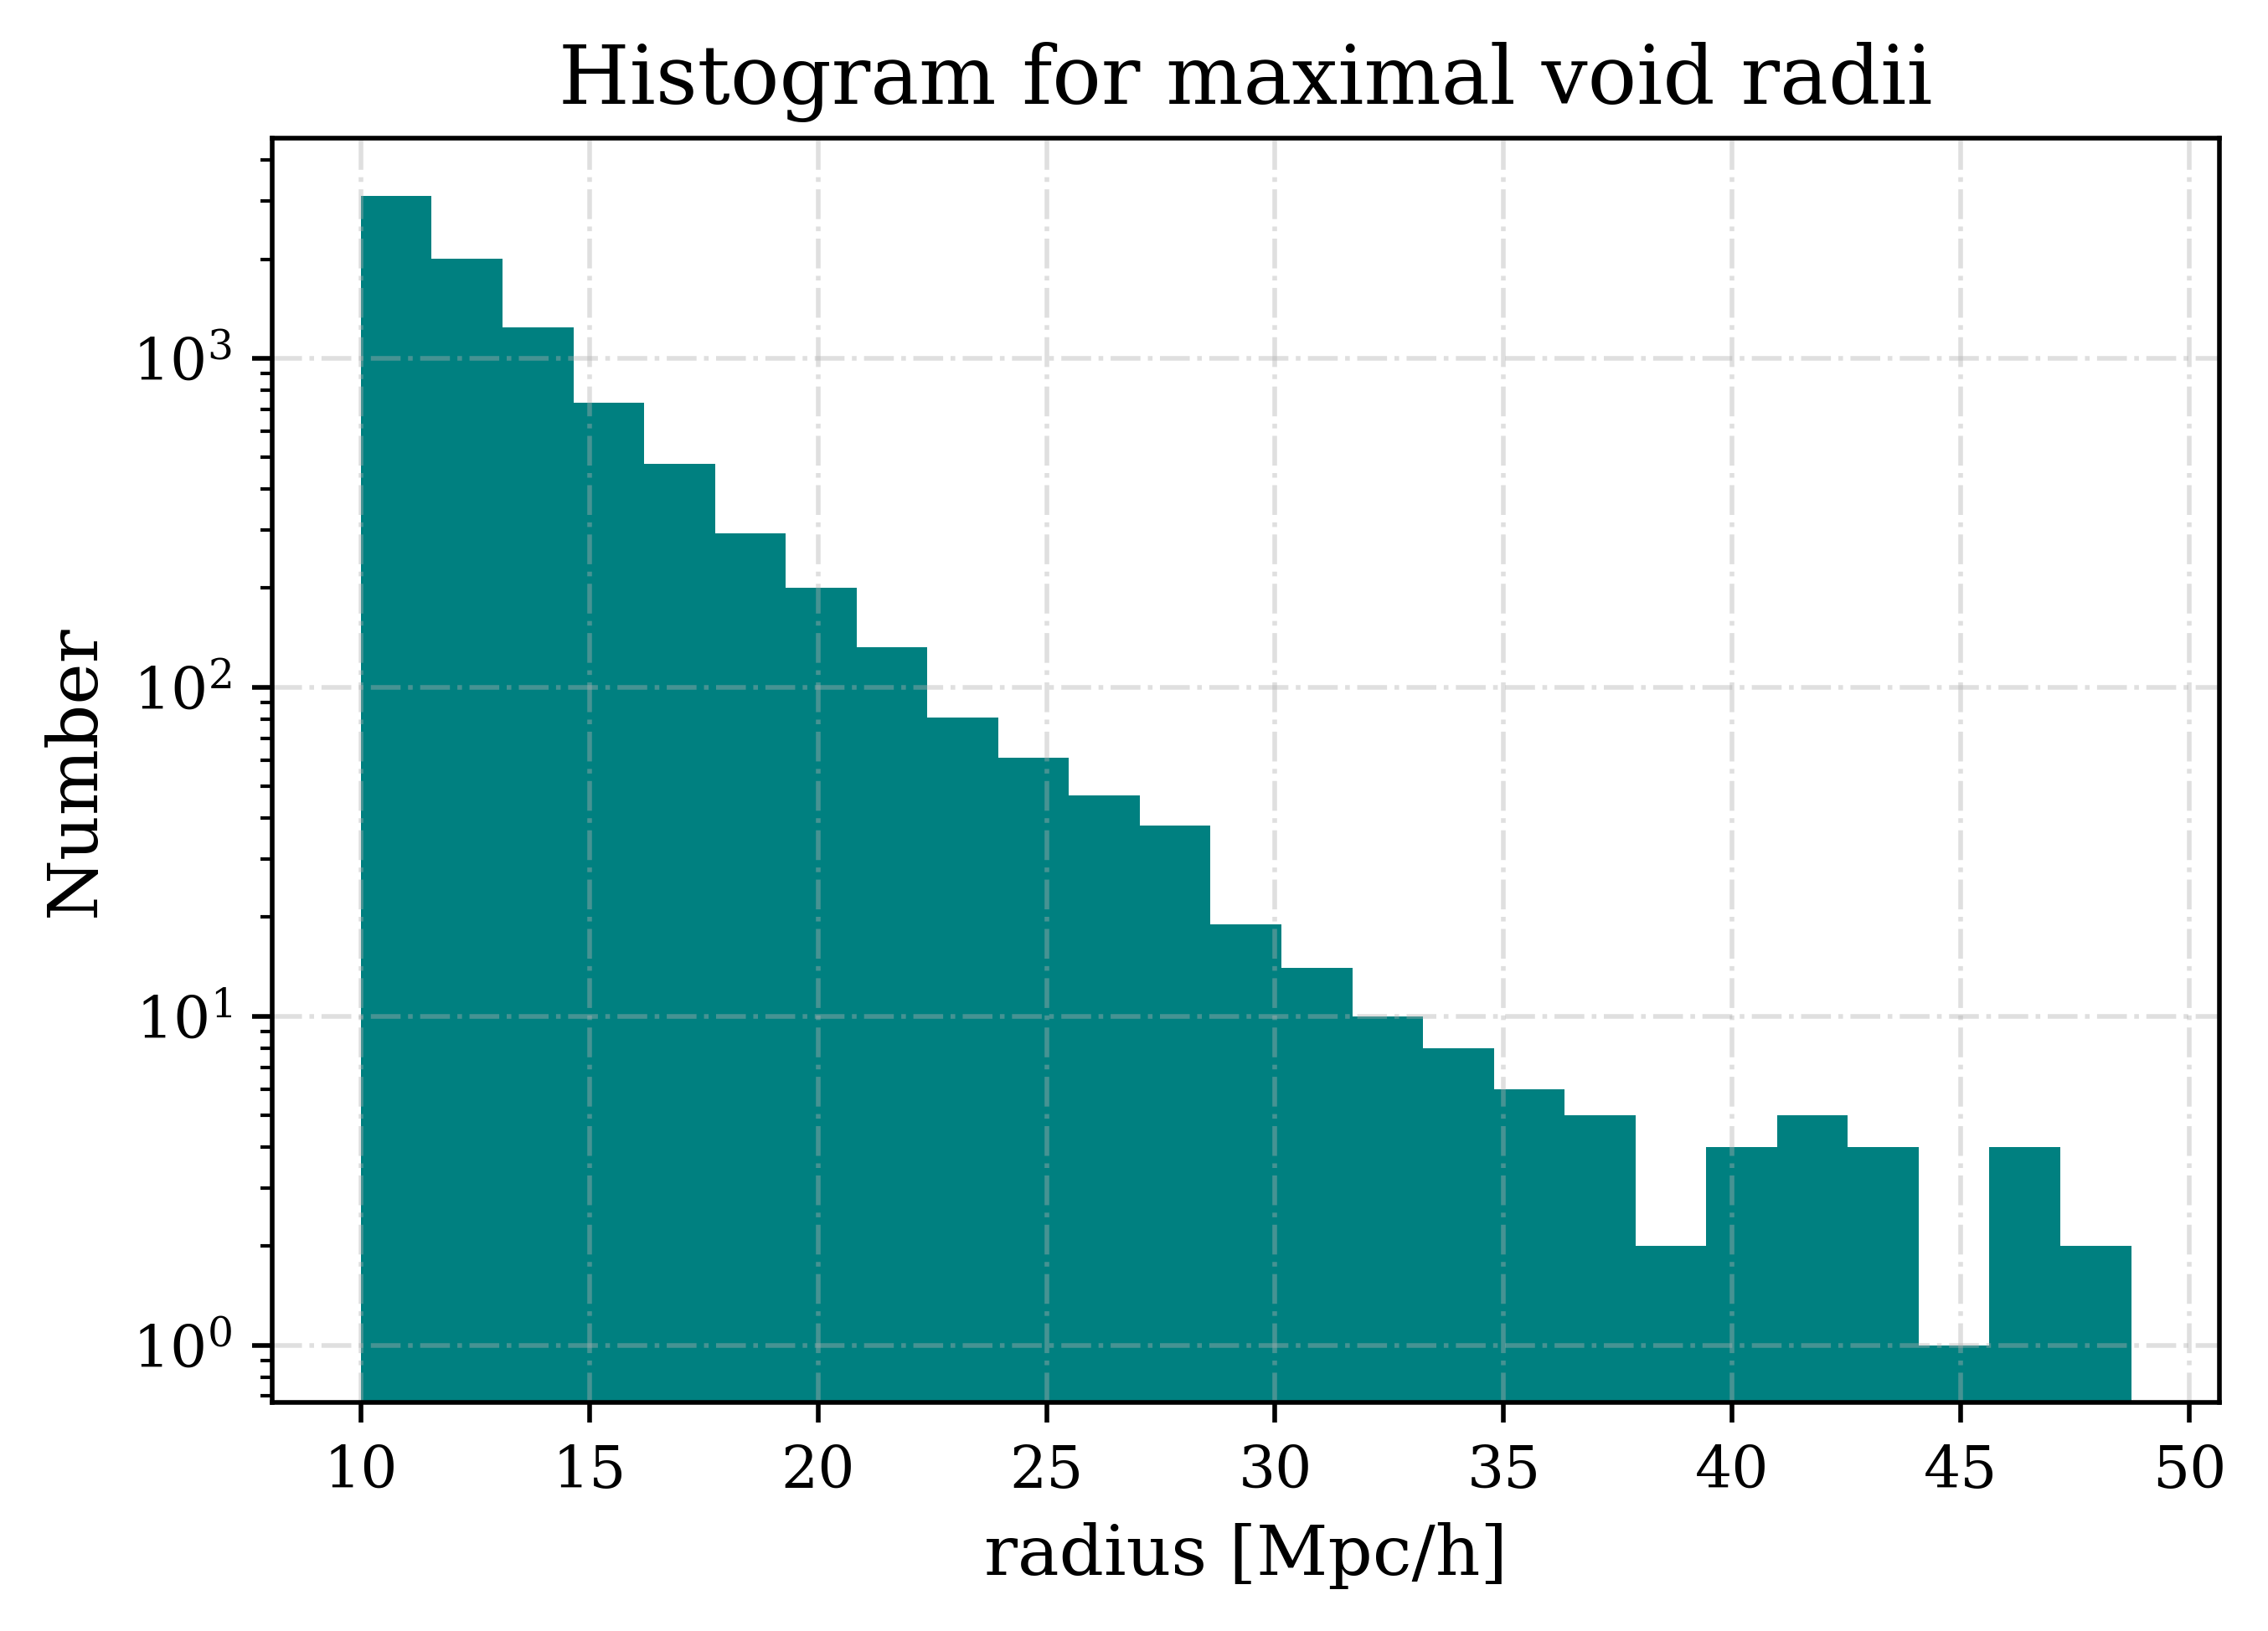

In [ ]:
#Histogram of redshift
dpi=500
mpl.rcParams['figure.dpi']= dpi

plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Histogram for maximal void radii',fontsize=14)                                         
plt.xlabel(r'radius [Mpc/h]',fontsize=12)                                                                       
plt.ylabel(r'Number',fontsize=12)                                                                   
                                                                                                    
plt.hist(voids['radius'] ,log=True, color='teal',bins=25)#,bins=range(int(min(galaxies['cz'])), int(max(galaxies['cz'])) + 0.1, 0.1), color='teal')                                                                   \
                                                                                                    
#plt.hist(2*np.pi*data[1].data['ra'], color='teal')                                                  
plt.show()                                                                                          
                                                                                                    
#plt.savefig('cz_distn.png')

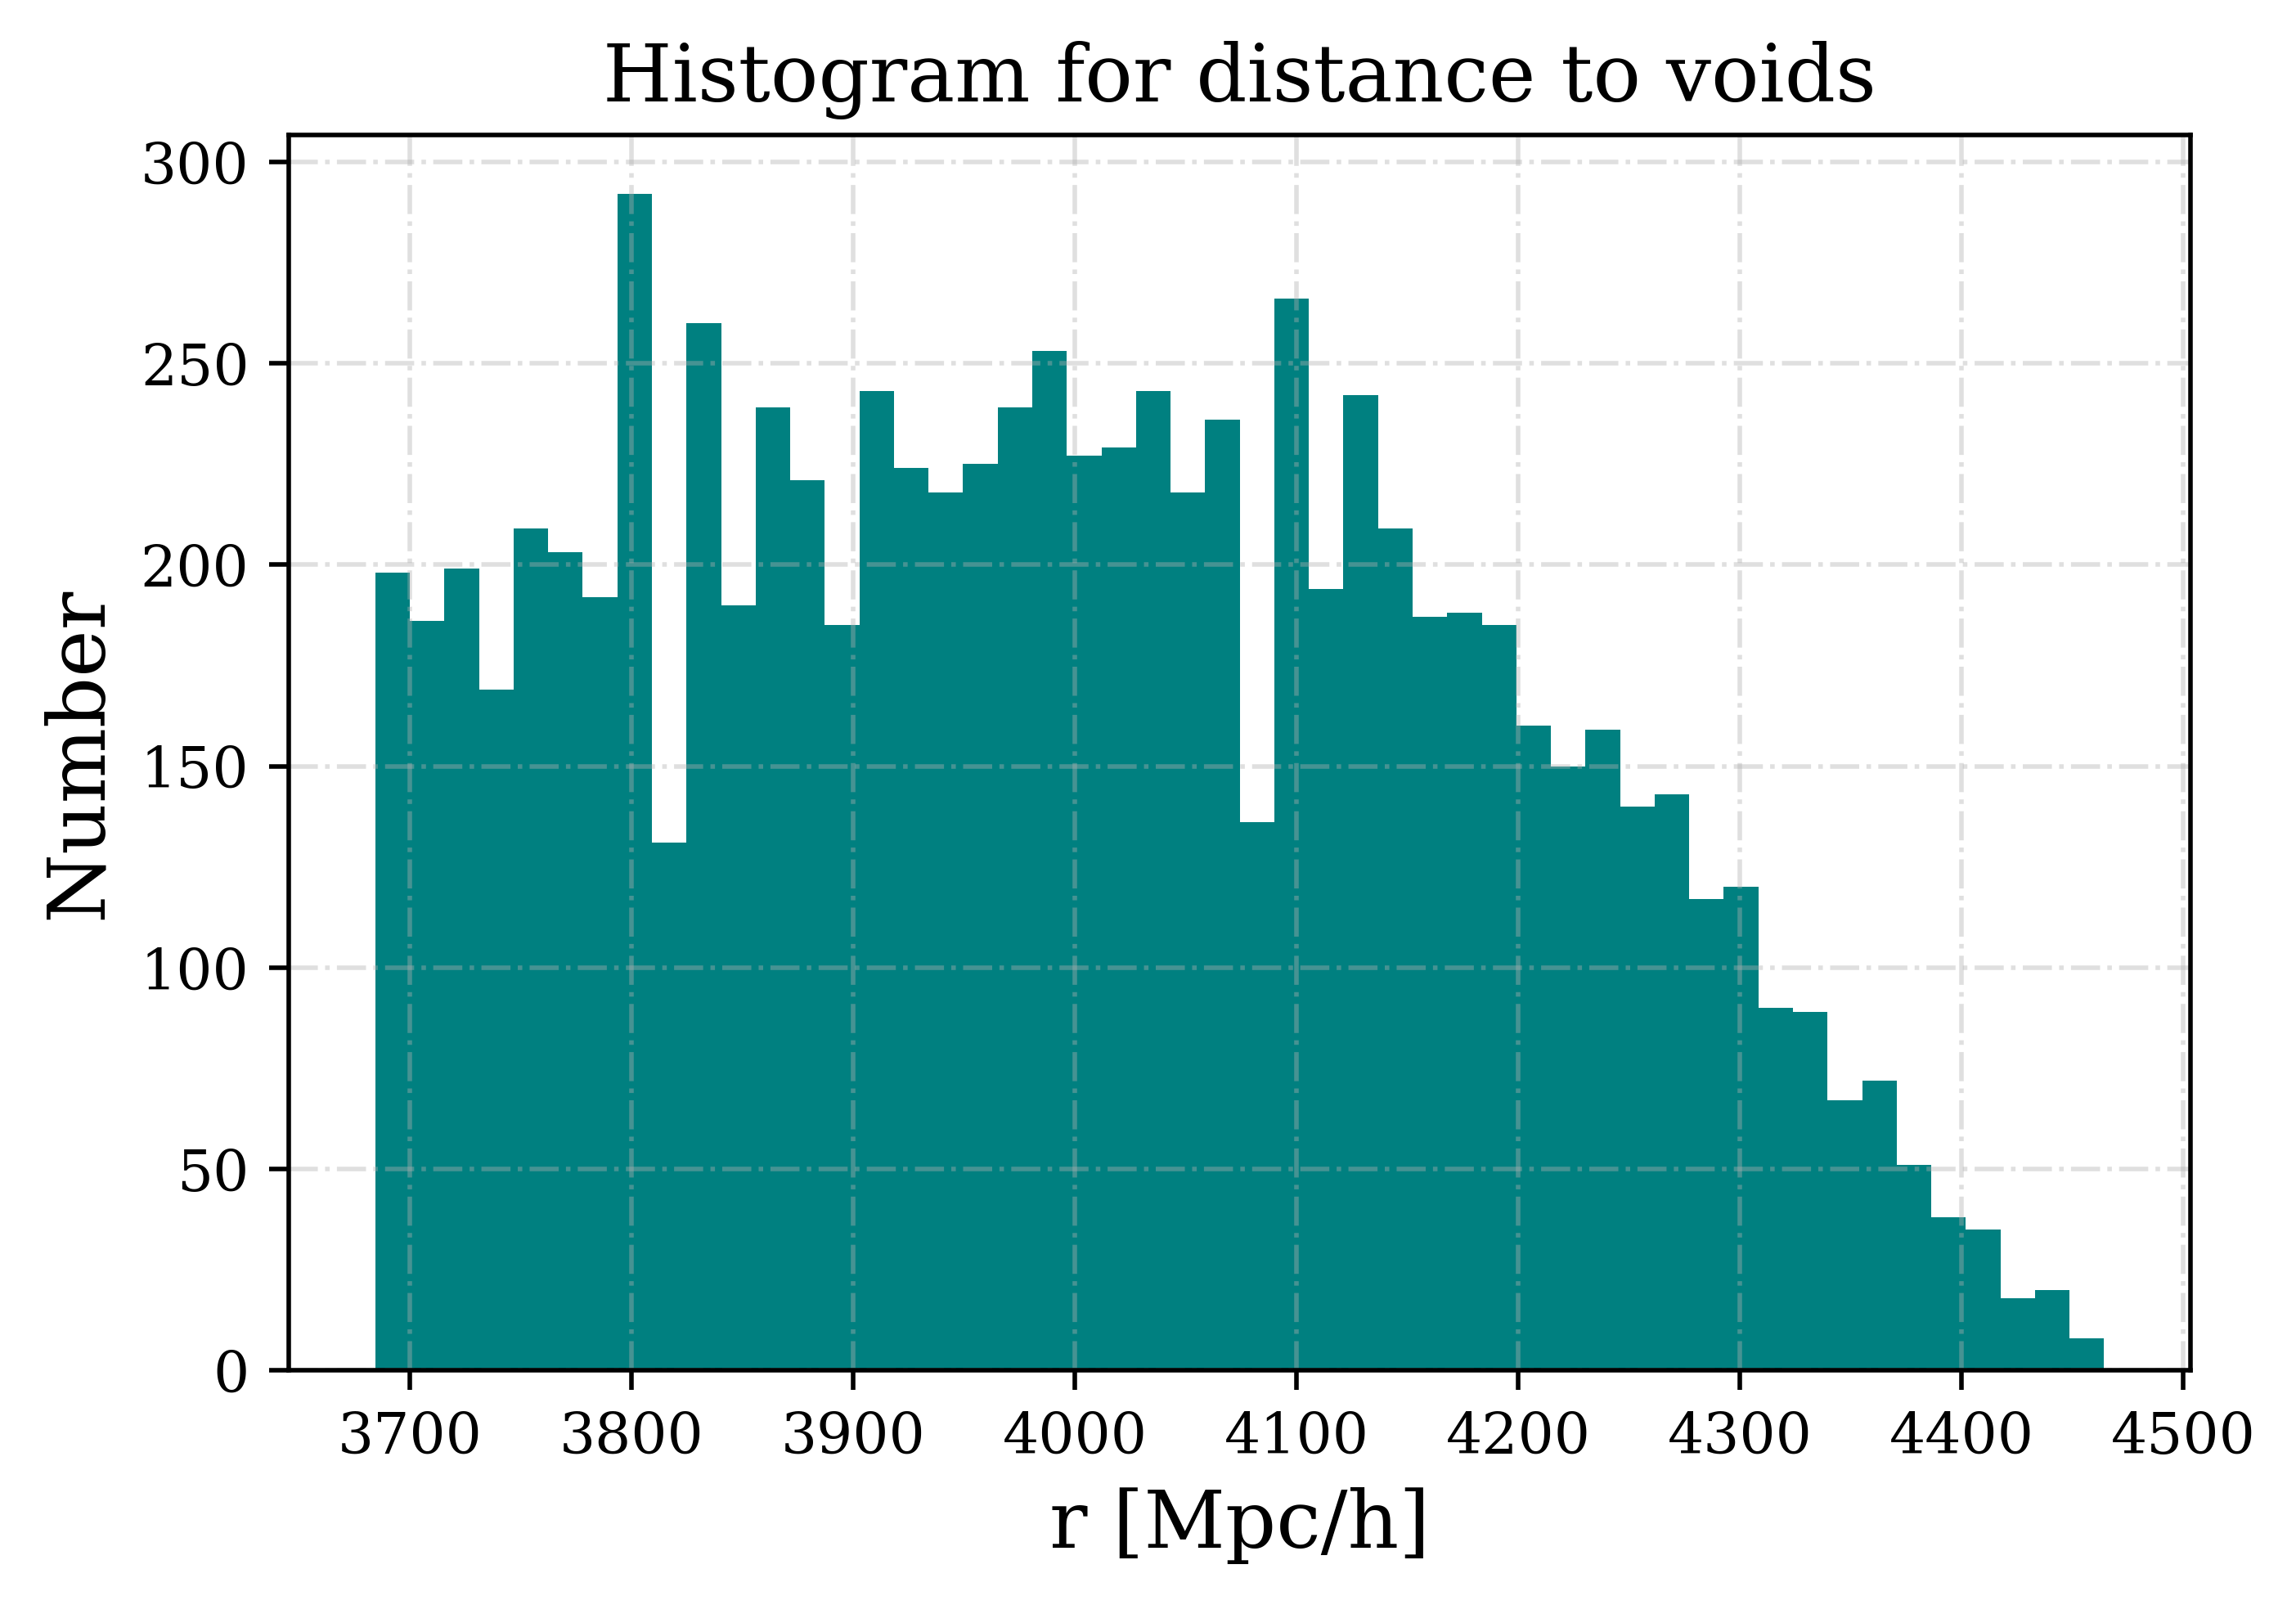

In [ ]:
#Histogram of redshift
dpi=500
mpl.rcParams['figure.dpi']= dpi

plt.figure()                                                                                        
plt.rc('text', usetex=False)                                                                        
plt.rc('font', family='serif')                                                                      
                                                                                                    
plt.grid(True,ls='-.',alpha=.4)                                                                     
plt.title(r'Histogram for distance to voids',fontsize=14)                                         
plt.xlabel(r'r [Mpc/h]',fontsize=14)                                                                       
plt.ylabel(r'Number',fontsize=14)                                                                   
                                                                                                    
plt.hist(voids['r'] ,color='teal',bins=50)#,bins=range(int(min(galaxies['cz'])), int(max(galaxies['cz'])) + 0.1, 0.1), color='teal')                                                                   \
                                                                                                    
#plt.hist(2*np.pi*data[1].data['ra'], color='teal')                                                  
plt.show()                                                                                          
                                                                                                    
#plt.savefig('cz_distn.png')

## Function to set up axes

Following matplotlib demo : https://matplotlib.org/examples/axes_grid/demo_floating_axes.html

In [ ]:
def setup_axes3(fig, rect, ra0, ra1, cz0, cz1):
    
    # rotate a bit for better orientation
    tr_rotate = Affine2D().translate(-90, 0)
    
    # scale degree to radians
    tr_scale = Affine2D().scale(np.pi/180, 1)

    tr = tr_rotate + tr_scale + mpl.projections.PolarAxes.PolarTransform()
    
    grid_locator1 = angle_helper.LocatorHMS(4)
    tick_formatter1 = angle_helper.FormatterHMS()
    
    grid_locator2 = MaxNLocator(3)
    
    grid_helper = floating_axes.GridHelperCurveLinear(tr, extremes=(ra0, ra1, cz0, cz1),
                                                      grid_locator1=grid_locator1,
                                                      grid_locator2=grid_locator2,
                                                      tick_formatter1=tick_formatter1,
                                                      tick_formatter2=None)

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
    fig.add_subplot(ax1)
    
    # adjust axis
    ax1.axis['left'].set_axis_direction('bottom')
    
    ax1.axis['right'].set_axis_direction('top')
    
    ax1.axis['bottom'].set_visible(False)
    
    ax1.axis['top'].set_axis_direction("bottom")
    ax1.axis['top'].toggle(ticklabels=True, label=True)
    ax1.axis['top'].major_ticklabels.set_axis_direction("top")
    ax1.axis['top'].label.set_axis_direction("top")
    
    #ax1.axis['left'].major_ticklabels.set_axis_direction('right')
    ax1.axis["left"].label.set_text("Comoving Distance [Mpc/h]")
    
    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.patch = ax1.patch  
    ax1.patch.zorder = 0.9  

    return ax1, aux_ax

## Wedge plot

In [ ]:
# 'd' is declination and 's' is the thickness of the declination slice
# Vary 'd' and 's' to get difference slices.
d,s = 0, 0.005 #s=2.5

# slice center, can use this for analysis since the slice thickness is very small.
slice_= d + 0.5*s


################################################################################
# Remove galaxies outside declination range
#-------------------------------------------------------------------------------
deltaf_dec_cut = np.logical_and(deltaf['dec'] > d, 
                                deltaf['dec'] <= d+s)
deltaf_dec_slice = deltaf[deltaf_dec_cut]
################################################################################


################################################################################
# Remove galaxies outside distance range
#-------------------------------------------------------------------------------
cz_min, cz_max = min(deltaf['comoving']), max(quasars['comoving']) #32700

deltaf_dist_boolean = np.logical_and(deltaf_dec_slice['comoving'] > cz_min, 
                                     deltaf_dec_slice['comoving'] <= cz_max)
deltaf_sample = deltaf_dec_slice[deltaf_dist_boolean]
################################################################################

quasars_dec_cut = np.logical_and(quasars['dec'] > d, 
                                 quasars['dec'] <= d+s)
quasars_dec_slice = quasars[quasars_dec_cut]

quasars_dist_boolean = np.logical_and(quasars_dec_slice['comoving'] > cz_min, 
                                      quasars_dec_slice['comoving'] <= cz_max)
quasars_sample = quasars_dec_slice[quasars_dist_boolean]

################################################################################
# Voids that intersect the slice
#-------------------------------------------------------------------------------
dec_intersect_cut = np.sin(np.abs(slice_ - voids['dec'])*np.pi/180)*voids['r'] <= voids['radius']
void_sample = voids[dec_intersect_cut]

# Radius of void at intersection
void_sample['radius_intersect'] = np.sqrt(void_sample['radius']**2 
                                          - (np.sin(np.abs(slice_ - void_sample['dec'])*np.pi/180)*void_sample['r'])**2)
################################################################################


################################################################################
# Transform hole centers from (ra, r) to (x, y)
#-------------------------------------------------------------------------------
void_sample['x_polar'] = void_sample['r']*np.cos(void_sample['ra']*np.pi/180 - 0.5*np.pi)
void_sample['y_polar'] = void_sample['r']*np.sin(void_sample['ra']*np.pi/180 - 0.5*np.pi)
################################################################################
max(void_sample['x_polar'])

3057.384364023821

In [ ]:
fig = plt.figure(figsize=(15,8))

# Range of RA to use in plot
ra_min, ra_max = -43, 45

ax, aux_ax = setup_axes3(fig, 111, ra_min, ra_max, cz_min, cz_max)


# Galaxies

#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 0], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 0], 
#            '.', c='0.5', ms=3, zorder=1, label='Wall')
#            #'.', c='0.5', zorder=1, label='Wall')
#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 1], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 1], 
#            '.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
#            #'.', c=(1,135/255,123/255), zorder=2, label='Void')

aux_ax.plot(deltaf_sample['ra'], 
            deltaf_sample['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c='0.5', ms=3, zorder=1, label='Delta fields')
            #'.', c='0.5', zorder=1, label='Wall')
aux_ax.plot(quasars_sample['ra'], 
            quasars_sample['comoving'], 
            '.', c=(1,135/255,123/255), ms=3, zorder=1, label='Quasars')
  
# Voids
holes = [plt.Circle((x,y), radius=r, transform=aux_ax.transData._b, fill=False, ec='b') 
         for x,y,r in zip(void_sample['x_polar'], void_sample['y_polar'], void_sample['radius_intersect'])]
for hole in holes:
    aux_ax.add_artist(hole)

aux_ax.scatter(void_sample['ra'], void_sample['r']*100, edgecolors='b', 
               s=void_sample['radius_intersect']*100, facecolors='none', 
               linewidth=1.5, zorder=3)

ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Void Map with comoving distance metric and DEC$\in$['+str(d)+','+str(d+s)+']')
#plt.text(s='DEC $\in$[(%s)]'%(d)) #'Sigmoid(%s)'%(a) #plt.text('DEC $\in$[(%s),(%s)]'%(d)%(d+s))
#plt.text('DEC'+str(d)+','+str(d+s))
mpl.rc('font', size=10)

plt.tight_layout();

plt.savefig('DR16_deltafields_comoving.eps', format='eps', dpi=300)

In [ ]:
len(deltaf_sample)

In [ ]:
len(quasars_sample)

In [ ]:
len(void_sample)

In [ ]:
delta_less=deltaf_sample[deltaf_sample['delta']<-0.2]
delta_more=deltaf_sample[deltaf_sample['delta']>0.2]
delta_mid=deltaf_sample[deltaf_sample['delta']<=0.2]
delta_mid=delta_mid[delta_mid['delta']>=-0.2]

In [ ]:
print(len(delta_mid))
print(len(delta_more))
print(len(delta_less))

In [ ]:
dpi=500
mpl.rcParams['figure.dpi']= dpi
fig = plt.figure(figsize=(15,8))

# Range of RA to use in plot
ra_min, ra_max = -15, 15

ax, aux_ax = setup_axes3(fig, 111, ra_min, ra_max, cz_min, cz_max)


# Galaxies

#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 0], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 0], 
#            '.', c='0.5', ms=3, zorder=1, label='Wall')
#            #'.', c='0.5', zorder=1, label='Wall')
#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 1], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 1], 
#            '.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
#            #'.', c=(1,135/255,123/255), zorder=2, label='Void')

aux_ax.plot(delta_mid['ra'], 
            delta_mid['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c=(0.45,0.45,0.45), ms=3, zorder=2, label='$-0.2<\delta<0.2$')
            #'.', c='0.5', zorder=1, label='Wall')
    
aux_ax.plot(delta_more['ra'], 
            delta_more['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c=(0.8,0.8,0.8), ms=3, zorder=3, label='Underdense with $\delta>0.2$')
aux_ax.plot(delta_less['ra'], 
            delta_less['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c=(0.1,0.1,0.1), ms=3, zorder=1, label='Overdense with $\delta<-0.2$')

aux_ax.plot(quasars_sample['ra'], 
            quasars_sample['comoving'], 
            '.', c=(1,135/255,123/255),  zorder=4, label='Quasars')
  
# Voids
holes = [plt.Circle((x,y), radius=r, transform=aux_ax.transData._b, fill=False, ec='b') 
         for x,y,r in zip(void_sample['x_polar'], void_sample['y_polar'], void_sample['radius_intersect'])]
for hole in holes:
    aux_ax.add_artist(hole)
'''
aux_ax.scatter(void_sample['ra'], void_sample['r']*100, edgecolors='b', 
               s=void_sample['radius_intersect']*100, facecolors='none', 
               linewidth=1.5, zorder=3)
'''
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Void Map with comoving distance metric with RA$\in$['+str(round(ra_min,2))+','+str(round(ra_max,2)+'] and DEC$\in$['+str(d)+','+str(d+s)+']')
#plt.text(s='DEC $\in$[(%s)]'%(d)) #'Sigmoid(%s)'%(a) #plt.text('DEC $\in$[(%s),(%s)]'%(d)%(d+s))
#plt.text('DEC'+str(d)+','+str(d+s))
mpl.rc('font', size=10)

plt.tight_layout();

#plt.savefig('DR16_deltafields_comoving.eps', format='eps', dpi=300)

In [ ]:
len(voids['r'])
quasars[0:5]

In [ ]:
len(quasars)

In [ ]:
len(deltaf)

In [ ]:
max(voids['r'])

In [ ]:
min(voids['r'])

In [ ]:
np.max(deltaf['delta'])

In [ ]:
# 'd' is declination and 's' is the thickness of the declination slice
# Vary 'd' and 's' to get difference slices.
d,s = 0, 0.05 #s=2.5

# slice center, can use this for analysis since the slice thickness is very small.
slice_= d + 0.5*s


################################################################################
# Remove galaxies outside declination range
#-------------------------------------------------------------------------------
deltaf_dec_cut = np.logical_and(deltaf['dec'] > d, 
                                deltaf['dec'] <= d+s)
deltaf_dec_slice = deltaf[deltaf_dec_cut]
################################################################################


################################################################################
# Remove galaxies outside distance range
#-------------------------------------------------------------------------------
cz_min, cz_max = min(deltaf['comoving']), max(quasars['comoving']) #32700

deltaf_dist_boolean = np.logical_and(deltaf_dec_slice['comoving'] > cz_min, 
                                     deltaf_dec_slice['comoving'] <= cz_max)
deltaf_sample = deltaf_dec_slice[deltaf_dist_boolean]
################################################################################

quasars_dec_cut = np.logical_and(quasars['dec'] > d, 
                                 quasars['dec'] <= d+s)
quasars_dec_slice = quasars[quasars_dec_cut]

quasars_dist_boolean = np.logical_and(quasars_dec_slice['comoving'] > cz_min, 
                                      quasars_dec_slice['comoving'] <= cz_max)
quasars_sample = quasars_dec_slice[quasars_dist_boolean]

################################################################################
# Voids that intersect the slice
#-------------------------------------------------------------------------------
dec_intersect_cut = np.sin(np.abs(slice_ - voids['dec'])*np.pi/180)*voids['r'] <= voids['radius']
void_sample = voids[dec_intersect_cut]

# Radius of void at intersection
void_sample['radius_intersect'] = np.sqrt(void_sample['radius']**2 
                                          - (np.sin(np.abs(slice_ - void_sample['dec'])*np.pi/180)*void_sample['r'])**2)
################################################################################


################################################################################
# Transform hole centers from (ra, r) to (x, y)
#-------------------------------------------------------------------------------
void_sample['x_polar'] = void_sample['r']*np.cos(void_sample['ra']*np.pi/180 - 0.5*np.pi)
void_sample['y_polar'] = void_sample['r']*np.sin(void_sample['ra']*np.pi/180 - 0.5*np.pi)
################################################################################
max(void_sample['x_polar'])

In [ ]:
fig = plt.figure(figsize=(15,8))

# Range of RA to use in plot
ra_min, ra_max = -43, 45

ax, aux_ax = setup_axes3(fig, 111, ra_min, ra_max, cz_min, cz_max)


# Galaxies

#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 0], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 0], 
#            '.', c='0.5', ms=3, zorder=1, label='Wall')
#            #'.', c='0.5', zorder=1, label='Wall')
#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 1], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 1], 
#            '.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
#            #'.', c=(1,135/255,123/255), zorder=2, label='Void')

aux_ax.plot(deltaf_sample['ra'], 
            deltaf_sample['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c='0.5', ms=3, zorder=1, label='Delta fields')
            #'.', c='0.5', zorder=1, label='Wall')
aux_ax.plot(quasars_sample['ra'], 
            quasars_sample['comoving'], 
            '.', c=(1,135/255,123/255), ms=3, zorder=1, label='Quasars')
  
# Voids
holes = [plt.Circle((x,y), radius=r, transform=aux_ax.transData._b, fill=False, ec='b') 
         for x,y,r in zip(void_sample['x_polar'], void_sample['y_polar'], void_sample['radius_intersect'])]
for hole in holes:
    aux_ax.add_artist(hole)

aux_ax.scatter(void_sample['ra'], void_sample['r']*100, edgecolors='b', 
               s=void_sample['radius_intersect']*100, facecolors='none', 
               linewidth=1.5, zorder=3)

ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Void Map with comoving distance metric and DEC$\in$['+str(d)+','+str(d+s)+']')
#plt.text(s='DEC $\in$[(%s)]'%(d)) #'Sigmoid(%s)'%(a) #plt.text('DEC $\in$[(%s),(%s)]'%(d)%(d+s))
#plt.text('DEC'+str(d)+','+str(d+s))
mpl.rc('font', size=10)

plt.tight_layout();

plt.savefig('DR16_deltafields_comoving.eps', format='eps', dpi=300)

In [ ]:
delta_less=deltaf_sample[deltaf_sample['delta']<-0.2]
delta_more=deltaf_sample[deltaf_sample['delta']>0.2]
delta_mid=deltaf_sample[deltaf_sample['delta']<=0.2]
delta_mid=delta_mid[delta_mid['delta']>=-0.2]

In [ ]:
dpi=500
mpl.rcParams['figure.dpi']= dpi
fig = plt.figure(figsize=(15,8))

# Range of RA to use in plot
ra_min, ra_max = -15, 15

ax, aux_ax = setup_axes3(fig, 111, ra_min, ra_max, cz_min, cz_max)


# Galaxies

#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 0], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 0], 
#            '.', c='0.5', ms=3, zorder=1, label='Wall')
#            #'.', c='0.5', zorder=1, label='Wall')
#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 1], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 1], 
#            '.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
#            #'.', c=(1,135/255,123/255), zorder=2, label='Void')

aux_ax.plot(delta_mid['ra'], 
            delta_mid['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c=(0.45,0.45,0.45), ms=3, zorder=2, label='$-0.2<\delta<0.2$')
            #'.', c='0.5', zorder=1, label='Wall')
    
aux_ax.plot(delta_more['ra'], 
            delta_more['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c=(0.8,0.8,0.8), ms=3, zorder=3, label='Underdense with $\delta>0.2$')
aux_ax.plot(delta_less['ra'], 
            delta_less['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c=(0.1,0.1,0.1), ms=3, zorder=1, label='Overdense with $\delta<-0.2$')

aux_ax.plot(quasars_sample['ra'], 
            quasars_sample['comoving'], 
            '.', c=(1,135/255,123/255),  zorder=4, label='Quasars')
  
# Voids
holes = [plt.Circle((x,y), radius=r, transform=aux_ax.transData._b, fill=False, ec='b') 
         for x,y,r in zip(void_sample['x_polar'], void_sample['y_polar'], void_sample['radius_intersect'])]
for hole in holes:
    aux_ax.add_artist(hole)
'''
aux_ax.scatter(void_sample['ra'], void_sample['r']*100, edgecolors='b', 
               s=void_sample['radius_intersect']*100, facecolors='none', 
               linewidth=1.5, zorder=3)
'''
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Void Map with comoving distance metric with RA$\in$['+str(ra_min)+','+str(ra_max)+'] and DEC$\in$['+str(d)+','+str(d+s)+']')
#plt.text(s='DEC $\in$[(%s)]'%(d)) #'Sigmoid(%s)'%(a) #plt.text('DEC $\in$[(%s),(%s)]'%(d)%(d+s))
#plt.text('DEC'+str(d)+','+str(d+s))
mpl.rc('font', size=10)

plt.tight_layout();

#plt.savefig('DR16_deltafields_comoving.eps', format='eps', dpi=300)

## All of them 

In [ ]:
# 'd' is declination and 's' is the thickness of the declination slice
# Vary 'd' and 's' to get difference slices.
d,s = -1.25, 2.5 #s=2.5

# slice center, can use this for analysis since the slice thickness is very small.
slice_= d + 0.5*s


################################################################################
# Remove galaxies outside declination range
#-------------------------------------------------------------------------------
deltaf_dec_cut = np.logical_and(deltaf['dec'] > d, 
                                deltaf['dec'] <= d+s)
deltaf_dec_slice = deltaf[deltaf_dec_cut]
################################################################################


################################################################################
# Remove galaxies outside distance range
#-------------------------------------------------------------------------------
cz_min, cz_max = min(deltaf['comoving']), max(quasars['comoving']) #32700

deltaf_dist_boolean = np.logical_and(deltaf_dec_slice['comoving'] > cz_min, 
                                     deltaf_dec_slice['comoving'] <= cz_max)
deltaf_sample = deltaf_dec_slice[deltaf_dist_boolean]
################################################################################

quasars_dec_cut = np.logical_and(quasars['dec'] > d, 
                                 quasars['dec'] <= d+s)
quasars_dec_slice = quasars[quasars_dec_cut]

quasars_dist_boolean = np.logical_and(quasars_dec_slice['comoving'] > cz_min, 
                                      quasars_dec_slice['comoving'] <= cz_max)
quasars_sample = quasars_dec_slice[quasars_dist_boolean]

################################################################################
# Voids that intersect the slice
#-------------------------------------------------------------------------------
dec_intersect_cut = np.sin(np.abs(slice_ - voids['dec'])*np.pi/180)*voids['r'] <= voids['radius']
void_sample = voids[dec_intersect_cut]

# Radius of void at intersection
void_sample['radius_intersect'] = np.sqrt(void_sample['radius']**2 
                                          - (np.sin(np.abs(slice_ - void_sample['dec'])*np.pi/180)*void_sample['r'])**2)
################################################################################


################################################################################
# Transform hole centers from (ra, r) to (x, y)
#-------------------------------------------------------------------------------
void_sample['x_polar'] = void_sample['r']*np.cos(void_sample['ra']*np.pi/180 - 0.5*np.pi)
void_sample['y_polar'] = void_sample['r']*np.sin(void_sample['ra']*np.pi/180 - 0.5*np.pi)
################################################################################
max(void_sample['x_polar'])

In [ ]:
fig = plt.figure(figsize=(15,8))

# Range of RA to use in plot
ra_min, ra_max = -43, 45

ax, aux_ax = setup_axes3(fig, 111, ra_min, ra_max, cz_min, cz_max)


# Galaxies

#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 0], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 0], 
#            '.', c='0.5', ms=3, zorder=1, label='Wall')
#            #'.', c='0.5', zorder=1, label='Wall')
#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 1], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 1], 
#            '.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
#            #'.', c=(1,135/255,123/255), zorder=2, label='Void')

aux_ax.plot(deltaf_sample['ra'], 
            deltaf_sample['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c='0.5', ms=3, zorder=1, label='Delta fields')
            #'.', c='0.5', zorder=1, label='Wall')
aux_ax.plot(quasars_sample['ra'], 
            quasars_sample['comoving'], 
            '.', c=(1,135/255,123/255), ms=3, zorder=1, label='Quasars')
  
# Voids
holes = [plt.Circle((x,y), radius=r, transform=aux_ax.transData._b, fill=False, ec='b') 
         for x,y,r in zip(void_sample['x_polar'], void_sample['y_polar'], void_sample['radius_intersect'])]
for hole in holes:
    aux_ax.add_artist(hole)

aux_ax.scatter(void_sample['ra'], void_sample['r']*100, edgecolors='b', 
               s=void_sample['radius_intersect']*100, facecolors='none', 
               linewidth=1.5, zorder=3)

ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Void Map with comoving distance metric and DEC$\in$['+str(d)+','+str(d+s)+']')
#plt.text(s='DEC $\in$[(%s)]'%(d)) #'Sigmoid(%s)'%(a) #plt.text('DEC $\in$[(%s),(%s)]'%(d)%(d+s))
#plt.text('DEC'+str(d)+','+str(d+s))
mpl.rc('font', size=10)

plt.tight_layout();

#plt.savefig('DR16_deltafields_comoving.eps', format='eps', dpi=300)

In [ ]:
delta_less=deltaf_sample[deltaf_sample['delta']<-0.2]
delta_more=deltaf_sample[deltaf_sample['delta']>0.2]
delta_mid=deltaf_sample[deltaf_sample['delta']<=0.2]
delta_mid=delta_mid[delta_mid['delta']>=-0.2]

In [ ]:
dpi=500
mpl.rcParams['figure.dpi']= dpi
fig = plt.figure(figsize=(15,8))

# Range of RA to use in plot
ra_min, ra_max = -15, 15

ax, aux_ax = setup_axes3(fig, 111, ra_min, ra_max, cz_min, cz_max)


# Galaxies

#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 0], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 0], 
#            '.', c='0.5', ms=3, zorder=1, label='Wall')
#            #'.', c='0.5', zorder=1, label='Wall')
#aux_ax.plot(galaxies_sample['ra'][galaxies_sample['vflag'] == 1], 
#            galaxies_sample['cz'][galaxies_sample['vflag'] == 1], 
#            '.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
#            #'.', c=(1,135/255,123/255), zorder=2, label='Void')

aux_ax.plot(delta_mid['ra'], 
            delta_mid['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c=(0.45,0.45,0.45), ms=3, zorder=2, label='$-0.2<\delta<0.2$')
            #'.', c='0.5', zorder=1, label='Wall')
    
aux_ax.plot(delta_more['ra'], 
            delta_more['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c=(0.8,0.8,0.8), ms=3, zorder=3, label='Underdense with $\delta>0.2$')
aux_ax.plot(delta_less['ra'], 
            delta_less['comoving'], 
            #'.', c=(1,135/255,123/255), ms=3, zorder=2, label='Void')
            '.', c=(0.1,0.1,0.1), ms=3, zorder=1, label='Overdense with $\delta<-0.2$')

aux_ax.plot(quasars_sample['ra'], 
            quasars_sample['comoving'], 
            '.', c=(1,135/255,123/255),  zorder=4, label='Quasars')
  
# Voids
holes = [plt.Circle((x,y), radius=r, transform=aux_ax.transData._b, fill=False, ec='b') 
         for x,y,r in zip(void_sample['x_polar'], void_sample['y_polar'], void_sample['radius_intersect'])]
for hole in holes:
    aux_ax.add_artist(hole)
'''
aux_ax.scatter(void_sample['ra'], void_sample['r']*100, edgecolors='b', 
               s=void_sample['radius_intersect']*100, facecolors='none', 
               linewidth=1.5, zorder=3)
'''
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.title('Void Map with comoving distance metric with RA$\in$['+str(ra_min)+','+str(ra_max)+'] and DEC$\in$['+str(d)+','+str(d+s)+']')
#plt.text(s='DEC $\in$[(%s)]'%(d)) #'Sigmoid(%s)'%(a) #plt.text('DEC $\in$[(%s),(%s)]'%(d)%(d+s))
#plt.text('DEC'+str(d)+','+str(d+s))
mpl.rc('font', size=10)

plt.tight_layout();

#plt.savefig('DR16_deltafields_comoving.eps', format='eps', dpi=300)